For this project, the data comes from the CIA World Factbook, a compendium of statistics about all of the countries on Earth.  
The SQLite database, factbook.db can be downloaded from their [GitHub repo](https://github.com/factbook/factbook.sql/releases).


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
conn = sqlite3.connect("factbook.db")


In [6]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [7]:
q2= "SELECT * FROM facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Calculating Summary Statistics 

In [8]:
q3= "SELECT MIN(population) AS minimum_population, max(population) max_population, min(population_growth) min_populaiton_growth_percentage, max(population_growth) max_population_growth_percentage FROM facts;"
pd.read_sql_query(q3, conn)

,minimum_population,max_population,min_populaiton_growth_percentage,max_population_growth_percentage
0,0,7256490011,0.0,4.02


## Getting more Information on the Extreme results

In [9]:
q4= "select * from facts where population = (SELECT MIN(population) from facts);"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [10]:
q5= "select * from facts where population = (SELECT MAX(population) from facts);"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


** These extreme population values seem like errors; From general knowledge, we know that the population of Antarctica is not 0 and the population value of the 7 billion is the total population of the world. **

## Fun Visualizations

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb5997f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb58a9ba8>]], dtype=object)

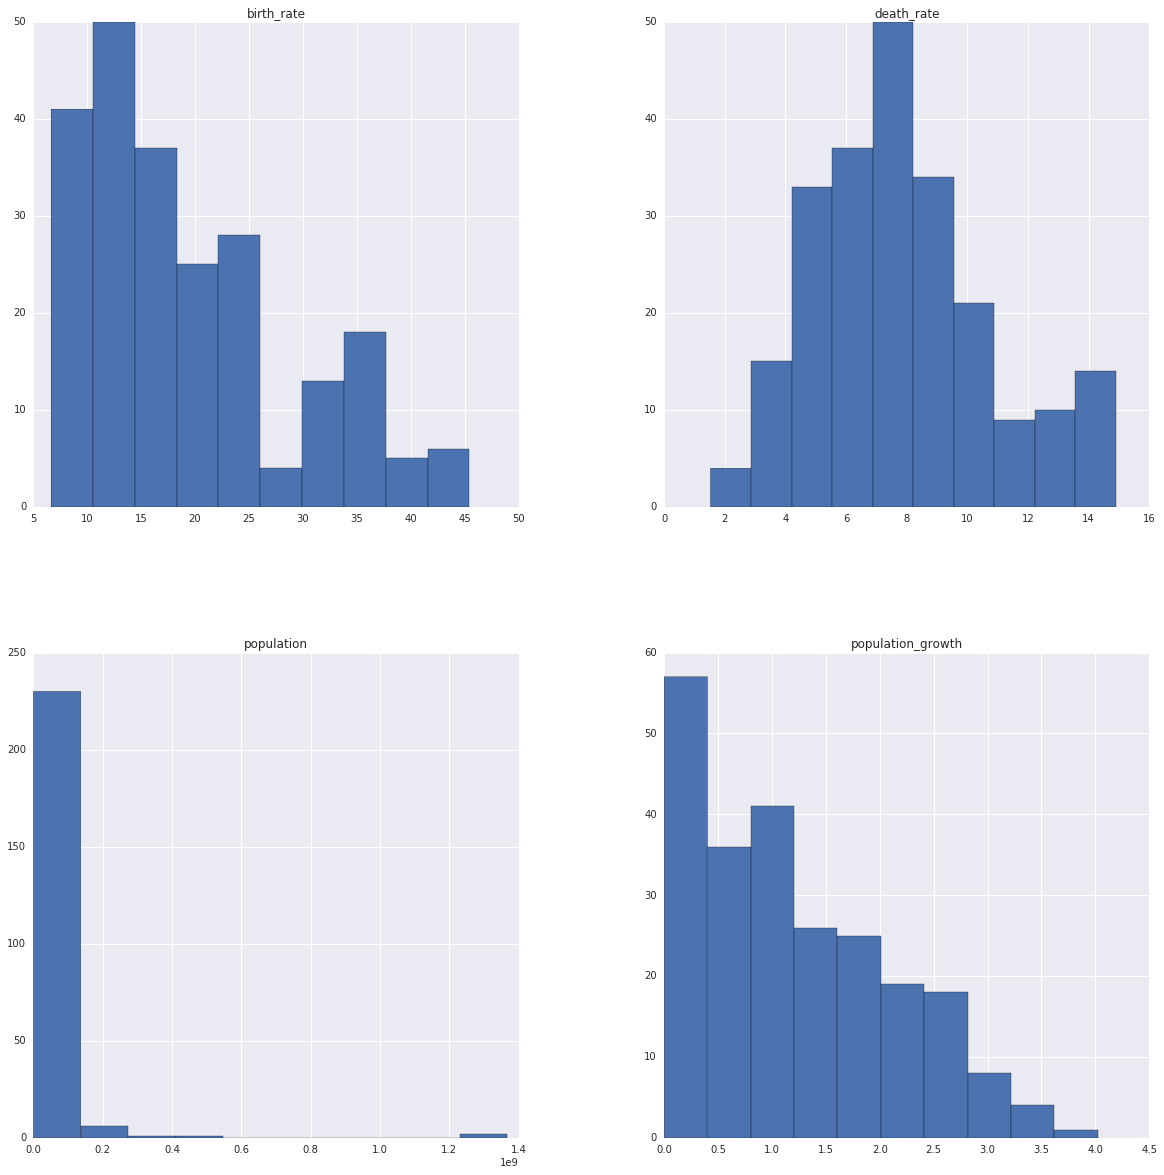

In [11]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

In [12]:

q7= '''
select name, cast(population as float)/ cast(area_land as float) as population_density
from facts
order by population_density desc
limit 10;
'''

pd.read_sql_query(q7,conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb4d0beb8>]], dtype=object)

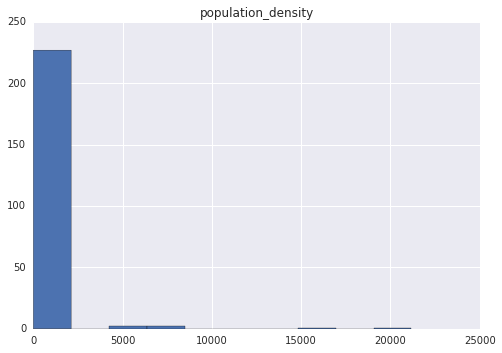

In [13]:
fig= plt.Figure(figsize=(10,10))

q8= '''
select name, cast(population as float)/ cast(area_land as float) as population_density
from facts;
'''
pd.read_sql_query(q8,conn).hist()

In [17]:
q9= '''
select name, cast(area_water as float)/ cast(area_land as float) as water_to_land_ratio
from facts
order by water_to_land_ratio desc
limit 10;
'''
print("Table showing the countries with the highest water to land ratio")
pd.read_sql_query(q9,conn)


Table showing the countries with the highest water to land ratio


,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [18]:
q9= '''
select name, cast(area_water as float)/ cast(area_land as float) as water_to_land_ratio
from facts
where water_to_land_ratio >1
limit 10;
'''
print("Table showing the countries with the highest water to land ratio")
pd.read_sql_query(q9,conn)


Table showing the countries with the highest water to land ratio


,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
